In [1]:
# 共通で利用するライブラリ
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_columns", None)
plt.style.use('seaborn')
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = 'IPAexGothic'

# この章で利用するライブラリ
from tensorflow.keras import datasets, layers, models
import cv2


In [2]:
def f_imshow(img):
    """画像をNotebook上のインラインに表示する"""
    img = cv2.imencode(".png", img)[1]
    display(Image(img))

# 11章　深層学習に挑戦する10本ノック
ここでは、深層学習を学ぶうえで必要なプログラムを実行していく流れを学ぶ。

前提条件

- 小売店の前を通る道路の画像・映像
  - img01.jpg（道路の通行人の画像（道路全体））
  - img02.jpg（自動車の画像）

### Knock101: 深層学習に必要なデータを準備する

- MNITS
  - 手書き数字画像データ

In [3]:
# データの読み込み

mnist = datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# 形状の出力

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# 0番目のデータの形状の出力

X_train[0].shape

(28, 28)

In [6]:
# 0番目のデータの表示

f_imshow(X_train[0])

In [7]:
# 0番目のデータの正解データ

y_train[0]

5

In [8]:
# 深層学習を行うためのデータの変換

# 正則化（各データを最大値で割る。0~1の値に変換する）
X_train_sc, X_test_sc = X_train / 255.0, X_test / 255.0

In [9]:
# 形状を整える

# 28*28pixelの次元に、チャンネル数の次元を加える
# 28 * 28 * チャンネル数（モノクロなので「1」）
X_train_sc = X_train_sc.reshape((60_000, 28, 28, 1))
X_tets_sc = X_test_sc.reshape((10_000, 28, 28, 1))

### Knock102: 深層学習モデルを構築する

- 多層ニューラルネットワーク
- CNN

In [10]:
# ニューラルネットワークモデル定義

model1 = models.Sequential()
model1.add(layers.Flatten(input_shape=(28, 28)))
model1.add(layers.Dense(512, activation="relu"))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(10, activation="softmax"))

2022-08-26 07:00:04.682133: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
# CNNモデル定義

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D(2, 2))
model2.add(layers.Conv2D(64, (3, 3), activation="relu"))
model2.add(layers.MaxPooling2D(2, 2))
model2.add(layers.Conv2D(64, (3, 3), activation="relu"))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation="relu"))
model2.add(layers.Dense(10, activation="softmax"))

In [13]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [14]:
# ニューラルネットワークモデル構築

model1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model1.fit(X_train_sc, y_train, epochs=10)
# 1m45s

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2224 - accuracy: 0.9330
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0974 - accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0691 - accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0532 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0435 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0375 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0312 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0269 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0255 - accuracy: 0.9915
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - loss:

In [15]:
# CNNモデル構築

model2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model2.fit(X_train_sc, y_train, epochs=10)
# 8m20s

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1457 - accuracy: 0.9563
Epoch 2/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0469 - accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0346 - accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0264 - accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0208 - accuracy: 0.9933
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0160 - accuracy: 0.9949
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0133 - accuracy: 0.9958
Epoch 8/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0123 - accuracy: 0.9962
Epoch 9/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0108 - accuracy: 0.9966
Epoch 10/10
1875/1875 [==============================] - 47s 25m

### Knock103: モデルを評価する

In [16]:
# model1の正解率

model1_test_los, model1_test_acc = model1.evaluate(X_test_sc, y_test)
print(model1_test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0768 - accuracy: 0.9821
0.9821000099182129


In [17]:
# model2の正解率

model2_test_los, model2_test_acc = model2.evaluate(X_test_sc, y_test)
print(model2_test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0341 - accuracy: 0.9904
0.9904000163078308


### Knock104: モデルを使った予測をする

In [18]:
# 予測の実行

predictions = model2.predict(X_train_sc)

1875/1875 [==============================] - 6s 3ms/step


In [19]:
# 予測結果の形状
# 「60000」の画像と「10」クラスそれぞれに対する類似度合いを計算した結果

predictions.shape

(60000, 10)

In [21]:
predictions

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
# 0番目の出力

predictions[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
# もっとも高い確率の予測数字

np.argmax(predictions[0])

5

In [23]:
# 正解データ

y_train[0]

5

### Knock105: 物体検出YOLOを使って人の検出を行う

- 物体家出を行う深層学習ネットワーク
- YOLOv3
- YOLOv3-tiny
- [yolov3-tf2](https://github.com/zzh8829/yolov3-tf2)

YOLOv3-tinyの準備


```bash
# yolov3-tf2のダウンロード
!git clone https://github.com/zzh8829/yolov3-tf2.git./yolov3_tf2
%cd ./yolov3_tf2
!git checkout c43df87d8582699aea8e9768b4ebe8d7fe1c6b4c
%cd ../
```

```bash
#YOLOの学習済みモデルのダウンロード
!wget https://pjreddie.com/media/files/yolov3-tiny.weights 
```

```bash
#ダウンロードしたYOLOの学習済みモデルをKerasから利用出来る形に変換
!python3 yolov3_tf2/convert.py --weights yolov3-tiny.weights --output  yolov3_tf2/checkpoints/yolov3-tiny.tf --tiny


2022-08-26 09:02:36.505321: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Model: "yolov3_tiny"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
==================================================================================================
 input (InputLayer)             [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 yolo_darknet (Functional)      ((None, None, None,  6298480     ['input[0][0]']                  
                                 256),                                                            
                                 (None, None, None,                                               
                                 1024))                                                           
                                                                                                  
 yolo_conv_0 (Functional)       (None, None, None,   263168      ['yolo_darknet[0][1]']           
                                256)                                                              
                                                                                                  
 yolo_conv_1 (Functional)       (None, None, None,   33280       ['yolo_conv_0[0][0]',            
                                384)                              'yolo_darknet[0][0]']           
                                                                                                  
 yolo_output_0 (Functional)     (None, None, None,   1312511     ['yolo_conv_0[0][0]']            
                                3, 85)                                                            
                                                                                                  
 yolo_output_1 (Functional)     (None, None, None,   951295      ['yolo_conv_1[0][0]']            
                                3, 85)                                                            
                                                                                                  
 yolo_boxes_0 (Lambda)          ((None, None, None,  0           ['yolo_output_0[0][0]']          
                                 3, 4),                                                           
                                 (None, None, None,                                               
                                 3, 1),                                                           
                                 (None, None, None,                                               
                                 3, 80),                                                          
                                 (None, None, None,                                               
                                 3, 4))                                                           
                                                                                                  
 yolo_boxes_1 (Lambda)          ((None, None, None,  0           ['yolo_output_1[0][0]']          
                                 3, 4),                                                           
                                 (None, None, None,                                               
                                 3, 1),                                                           
                                 (None, None, None,                                               
                                 3, 80),                                                          
                                 (None, None, None,                                               
                                 3, 4))                                                           
                                                                                                  
 yolo_nms (Lambda)              ((1, None, 4),       0           ['yolo_boxes_0[0][0]',           
                                 (1, None),                       'yolo_boxes_0[0][1]',           
                                 (1, None),                       'yolo_boxes_0[0][2]',           
                                 (1,))                            'yolo_boxes_1[0][0]',           
                                                                  'yolo_boxes_1[0][1]',           
                                                                  'yolo_boxes_1[0][2]']           
                                                                                                  
==================================================================================================
Total params: 8,858,734
Trainable params: 8,852,366
Non-trainable params: 6,368
__________________________________________________________________________________________________
I0826 09:02:37.032343 4505515520 convert.py:24] model created
I0826 09:02:37.033011 4505515520 utils.py:44] yolo_darknet/conv2d bn
I0826 09:02:37.034296 4505515520 utils.py:44] yolo_darknet/conv2d_1 bn
I0826 09:02:37.035688 4505515520 utils.py:44] yolo_darknet/conv2d_2 bn
I0826 09:02:37.037266 4505515520 utils.py:44] yolo_darknet/conv2d_3 bn
I0826 09:02:37.039098 4505515520 utils.py:44] yolo_darknet/conv2d_4 bn
I0826 09:02:37.043732 4505515520 utils.py:44] yolo_darknet/conv2d_5 bn
I0826 09:02:37.049914 4505515520 utils.py:44] yolo_darknet/conv2d_6 bn
I0826 09:02:37.088458 4505515520 utils.py:44] yolo_conv_0/conv2d_7 bn
I0826 09:02:37.092405 4505515520 utils.py:44] yolo_output_0/conv2d_8 bn
I0826 09:02:37.097918 4505515520 utils.py:44] yolo_output_0/conv2d_9 bias
I0826 09:02:37.099339 4505515520 utils.py:44] yolo_conv_1/conv2d_10 bn
I0826 09:02:37.100522 4505515520 utils.py:44] yolo_output_1/conv2d_11 bn
I0826 09:02:37.104185 4505515520 utils.py:44] yolo_output_1/conv2d_12 bias
I0826 09:02:37.105022 4505515520 convert.py:27] weights loaded
I0826 09:02:37.261889 4505515520 convert.py:31] sanity check passed
I0826 09:02:37.432790 4505515520 convert.py:34] weights saved
```

YOLOv3-tinyによる物体検出の実行

In [25]:
from absl import app, logging, flags
from absl.flags import FLAGS

app._run_init(["yolov3"], app.parse_flags_with_usage)

['yolov3']

In [27]:
# 学習済みの重みをそのまま利用する

import tensorflow as tf
from yolov3_tf2.yolov3_tf2.models import YoloV3Tiny, YoloLoss
from yolov3_tf2.yolov3_tf2.dataset import transform_images
from yolov3_tf2.yolov3_tf2.utils import draw_outputs

FLAGS.yolo_iou_threshold = 0.5
FLAGS.yolo_score_threshold = 0.5

yolo_class_names = [c.strip() for c in open("./yolov3_tf2/data/coco.names").readlines()]

yolo = YoloV3Tiny(classes=80)

# 重みの読み込み
yolo.load_weights("./yolov3_tf2/checkpoints/yolov3-tiny.tf").expect_partial()

In [36]:
img_filename = "./support/11章/img/img01.jpg"
img_raw_p = tf.image.decode_and_crop_jpeg(
    contents=open(img_filename, "rb").read(),
    crop_window=[0, 0, 1440, 1920],
    channels=3
)
data_shape = (256, 256, 3)
img_yolo_p = transform_images(img_raw_p, data_shape[0])
img_yolo_p = np.expand_dims(img_yolo_p, 0)

# 予測開始
boxes, scores, classes, nums = yolo.predict(img_yolo_p)

1/1 [==============================] - 0s 60ms/step


結果の出力

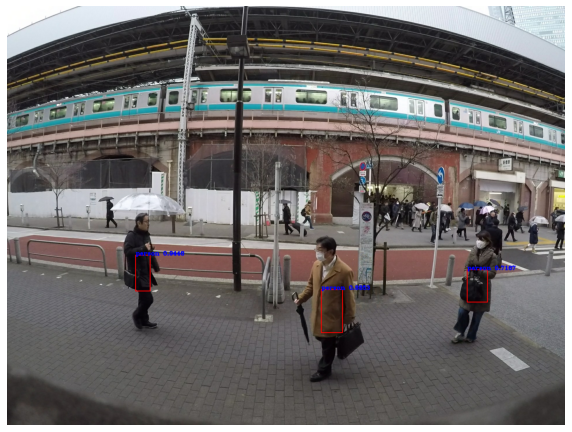

In [37]:
img_yolo_p = img_raw_p.numpy()
img_yolo_p = draw_outputs(img_yolo_p, (boxes, scores, classes, nums), yolo_class_names)

plt.figure(figsize=(10, 10))
plt.imshow(img_yolo_p)
plt.axis("off")
plt.show()

### Knock106: YOLOの学習を行うための準備をする